In [1]:
import pandas as pd
# import numpy  as np
import matplotlib.pyplot as plt
import random
import copy
from copy import deepcopy
import seaborn as sns
from pylab import *
import matplotlib.patches as patches
import time


In [2]:
#upload WSE excel file
# from google.colab import files
# uploaded = files.upload()

In [3]:
# check the uploaded file name
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [4]:
excel_data = pd.ExcelFile("WSE_BusinessPlanning_InputToChallenge.xlsx")
excel_data.sheet_names
df = excel_data.parse("WSE_BusinessPlanning_InputToCha")
df.head(100)

,Project Name,Oil/Gas,Earliest Spud Year,Drilling duration [days],Gas [km3/d] 2019,Gas [km3/d] 2020,Gas [km3/d] 2021,Gas [km3/d] 2022,Gas [km3/d] 2023,Gas [km3/d] 2024,...,Oil [m3/d] 2031,Oil [m3/d] 2032,Oil [m3/d] 2033,Oil [m3/d] 2034,Oil [m3/d] 2035,Oil [m3/d] 2036,Oil [m3/d] 2037,Oil [m3/d] 2038,Oil [m3/d] 2039,Oil [m3/d] 2040
0,Development_20_Oil,Oil,2019,90,NaN,NaN,NaN,NaN,NaN,NaN,...,0.080916,0.020568,0.004705,0.000969,1.795160e-04,2.993820e-05,4.493560e-06,6.070130e-07,7.379860e-08,8.074970e-09
1,Development_21_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,3.659917,1.878789,0.916239,0.424485,1.868273e-01,7.811629e-02,3.102891e-02,1.170887e-02,4.197465e-03,1.429496e-03
2,Development_22_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,13.940763,9.382511,6.125243,3.878818,2.382578e+00,1.419602e+00,8.204608e-01,4.599607e-01,2.501241e-01,1.319356e-01
3,Development_23_Oil,Oil,2019,90,NaN,NaN,NaN,NaN,NaN,NaN,...,36.196948,27.836263,20.978576,15.494128,1.121461e+01,7.954770e+00,5.529642e+00,3.766972e+00,2.514861e+00,1.645362e+00
4,Development_24_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,41.367940,31.812872,23.975515,17.707575,1.281670e+01,9.091166e+00,6.319591e+00,4.305111e+00,2.874127e+00,1.880414e+00
5,Development_25_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,5.489875,2.818184,1.374358,0.636728,2.802409e-01,1.171744e-01,4.654336e-02,1.756331e-02,6.296198e-03,2.144243e-03
6,Development_26_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0.524226,0.177321,0.055181,0.015798,4.161142e-03,1.008337e-03,2.247950e-04,4.610580e-05,8.699850e-06,1.510280e-06
7,Development_27_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067430,0.017140,0.003921,0.000807,1.495960e-04,2.494850e-05,3.744630e-06,5.058440e-07,6.149880e-08,6.729140e-09
8,Development_28_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011684,0.002217,0.000370,0.000054,7.040170e-06,8.012880e-07,8.025590e-08,7.073720e-09,5.486570e-10,3.744870e-11
9,Development_29_Oil,Oil,2019,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040458,0.010284,0.002353,0.000484,8.975790e-05,1.496910e-05,2.246780e-06,3.035070e-07,3.689930e-08,4.037490e-09


In [5]:
# separate oil and gas projects
df_gas = df[df['Oil/Gas'] == 'Gas']
df_oil = df[df['Oil/Gas'] == 'Oil']

# remove production colums with NaN
# df_gas.columns
oil_prod_cols = ['Oil [m3/d] 2019',\
       'Oil [m3/d] 2020', 'Oil [m3/d] 2021', 'Oil [m3/d] 2022',\
       'Oil [m3/d] 2023', 'Oil [m3/d] 2024', 'Oil [m3/d] 2025',\
       'Oil [m3/d] 2026', 'Oil [m3/d] 2027', 'Oil [m3/d] 2028',\
       'Oil [m3/d] 2029', 'Oil [m3/d] 2030', 'Oil [m3/d] 2031',\
       'Oil [m3/d] 2032', 'Oil [m3/d] 2033', 'Oil [m3/d] 2034',\
       'Oil [m3/d] 2035', 'Oil [m3/d] 2036', 'Oil [m3/d] 2037',\
       'Oil [m3/d] 2038', 'Oil [m3/d] 2039', 'Oil [m3/d] 2040']

gas_prod_cols = ['Gas [km3/d] 2019', 'Gas [km3/d] 2020',\
       'Gas [km3/d] 2021', 'Gas [km3/d] 2022', 'Gas [km3/d] 2023',\
       'Gas [km3/d] 2024', 'Gas [km3/d] 2025', 'Gas [km3/d] 2026',\
       'Gas [km3/d] 2027', 'Gas [km3/d] 2028', 'Gas [km3/d] 2029',\
       'Gas [km3/d] 2030', 'Gas [km3/d] 2031', 'Gas [km3/d] 2032',\
       'Gas [km3/d] 2033', 'Gas [km3/d] 2034', 'Gas [km3/d] 2035',\
       'Gas [km3/d] 2036', 'Gas [km3/d] 2037', 'Gas [km3/d] 2038',\
       'Gas [km3/d] 2039', 'Gas [km3/d] 2040']

df_gas = df_gas.drop(oil_prod_cols, axis = 1)
df_oil = df_oil.drop(gas_prod_cols,axis=1)


# replace NaN with 0
df_gas = df_gas.fillna(0)
df_oil = df_oil.fillna(0)
df_gas = df_gas.rename(columns=lambda s: s[-4:])
df_oil = df_oil.rename(columns=lambda s: s[-4:])

# add a dummy rows accounting for wait times
waiting_days =180
num_entries = 17

columns = df_gas.columns

index = 82
for i in range(num_entries):
  values = ['Waiting_' + str(index), 'Gas', 2019, waiting_days, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0]
  df_entry = pd.DataFrame([values],columns =list(columns))
  df_entry = df_entry.set_index([pd.Index([index])])
  df_gas = df_gas.append(df_entry)
  index = index+1

frames = [df_oil,df_gas]

df_all = pd.concat(frames)


In [6]:
(df_all.head(120))

,Name,/Gas,Year,ays],2019,2020,2021,2022,2023,2024,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Development_20_Oil,Oil,2019,90,300.0,270.0,218.70000,159.432300,104.603532,61.767340,...,0.080916,0.020568,0.004705,0.000969,1.795160e-04,2.993820e-05,4.493560e-06,6.070130e-07,7.379860e-08,8.074970e-09
1,Development_21_Oil,Oil,2019,60,200.0,190.0,171.47500,147.018378,119.747388,92.658246,...,3.659917,1.878789,0.916239,0.424485,1.868273e-01,7.811629e-02,3.102891e-02,1.170887e-02,4.197465e-03,1.429496e-03
2,Development_22_Oil,Oil,2019,60,150.0,145.5,136.90095,124.945801,110.613619,94.987678,...,13.940763,9.382511,6.125243,3.878818,2.382578e+00,1.419602e+00,8.204608e-01,4.599607e-01,2.501241e-01,1.319356e-01
3,Development_23_Oil,Oil,2019,90,175.0,171.5,164.70860,155.022417,142.987741,129.249593,...,36.196948,27.836263,20.978576,15.494128,1.121461e+01,7.954770e+00,5.529642e+00,3.766972e+00,2.514861e+00,1.645362e+00
4,Development_24_Oil,Oil,2019,60,200.0,196.0,188.23840,177.168476,163.414561,147.713820,...,41.367940,31.812872,23.975515,17.707575,1.281670e+01,9.091166e+00,6.319591e+00,4.305111e+00,2.874127e+00,1.880414e+00
5,Development_25_Oil,Oil,2019,60,300.0,285.0,257.21250,220.527567,179.621082,138.987369,...,5.489875,2.818184,1.374358,0.636728,2.802409e-01,1.171744e-01,4.654336e-02,1.756331e-02,6.296198e-03,2.144243e-03
6,Development_26_Oil,Oil,2019,60,350.0,322.0,272.54080,212.224251,152.035959,100.204091,...,0.524226,0.177321,0.055181,0.015798,4.161142e-03,1.008337e-03,2.247950e-04,4.610580e-05,8.699850e-06,1.510280e-06
7,Development_27_Oil,Oil,2019,60,250.0,225.0,182.25000,132.860250,87.169610,51.472783,...,0.067430,0.017140,0.003921,0.000807,1.495960e-04,2.494850e-05,3.744630e-06,5.058440e-07,6.149880e-08,6.729140e-09
8,Development_28_Oil,Oil,2019,60,250.0,220.0,170.36800,116.101022,69.625244,36.743463,...,0.011684,0.002217,0.000370,0.000054,7.040170e-06,8.012880e-07,8.025590e-08,7.073720e-09,5.486570e-10,3.744870e-11
9,Development_29_Oil,Oil,2019,60,150.0,135.0,109.35000,79.716150,52.301766,30.883670,...,0.040458,0.010284,0.002353,0.000484,8.975790e-05,1.496910e-05,2.246780e-06,3.035070e-07,3.689930e-08,4.037490e-09


In [7]:
# this method will return the output for a gas or oil project during the time window
def asset_output(proj_type, index, start_date):
  global df_gas
  global df_oil
  global df_all
 
  if proj_type =="Oil":
    proj_data = df_oil.loc[index].values
  elif proj_type =="Gas":
    proj_data = df_gas.loc[index].values
  else:
    proj_data = df_all.loc[index].values

  years = 22 # from 2019 to 2040
  output = [0]*years

  start_year = start_date//365
  days_left = 365 - start_date%365
  days_right = start_date%365

  project_year = proj_data[2] - 2019
  output[start_year] = days_left*proj_data[4+project_year]
  for year in range(start_year+1,years):
    output[year] = days_right*proj_data[4+project_year] + days_left*proj_data[4+project_year+1]
    project_year = project_year+1
  return output

In [8]:
def sequence_output(proj_type, index_sequence):
  global df_gas
  global df_oil
  global df_all

  if proj_type =="Oil":
    df = df_oil
  elif proj_type =="Gas":
    df = df_gas
  else:
    df = df_all

  start_date = 0
  penalty_factor = 1


  years = 22 # from 2019 to 2040
  output_gas = [0]*years
  output_oil = [0]*years

  for index in index_sequence:
    if ((df.loc[index].values[2] -2019)*365 > start_date):
      start_date = (df.loc[index].values[2] -2019)*365 + df.loc[index].values[3]
    else:
      start_date = start_date + df.loc[index].values[3]

    if proj_type =="Oil":
        proj_data = df_oil.loc[index].values
    elif proj_type =="Gas":
        proj_data = df_gas.loc[index].values
    else:
        proj_data = df_all.loc[index].values
 
    output = [0]*years

    start_year = start_date//365
    days_left = 365 - start_date%365
    days_right = start_date%365

    project_year = proj_data[2] - 2019
    output[start_year] = days_left*proj_data[4+project_year]
    for year in range(start_year+1,years):
      output[year] = days_right*proj_data[4+project_year] + days_left*proj_data[4+project_year+1]
      project_year = project_year+1

    if (df.loc[index].values[1]=="Oil"):
      output_oil = [x + y for x, y in zip(output_oil, output)]
      # output_oil = [x + y for x, y in zip(output_oil, asset_output(proj_type, index, start_date))]
    else:
      output_gas = [x + y for x, y in zip(output_gas, output)]
      # output_gas = [x + y for x, y in zip(output_gas, asset_output(proj_type, index, start_date))]

  output_gas_modified = sum([-1*penalty_factor*abs(365000 - x) for x in output_gas[2:]]) # penalty from 2021 onwards
  if (proj_type == "Oil"):
    total_output = sum(output_oil[2:7])
  else:
    total_output = sum(output_oil[2:7]) + output_gas_modified

  return total_output

In [9]:
sqrt(100)

10.0

In [10]:
import random
def generate_population(proj_type, num_pop):
  global df_gas
  global df_oil
  global df_all
  if proj_type =="Oil":
    df = df_oil
  elif proj_type =="Gas":
    df = df_gas
  else:
    df = df_all

  index_list_oil = list(df_oil.index)
  index_list_gas = list(df_gas.index)
  population = [] # 2D list 

  tw_start = 365*2
  tw_end = 365*7
  
  # # startegy 1
  # for i in range(num_pop):
  #   index_list_temp = deepcopy(index_list)
  #   individual = []
  #   start_date = 0
  #   while (len(index_list_temp)>0):
  #     index = random.randint(0,len(index_list_temp)-1)
  #     if (2019 + start_date//365 >= df.iloc[index].values[2]):
  #       individual.append(index_list_temp.pop(index))
  #       start_date = start_date + df.iloc[index].values[3]
  #   population.append(individual)
  
  # startegy 2
  avg_prod = []
  window_size = 5
  for index in index_list_oil:
    step = df_oil.loc[index].values[2]-2019
    avg_prod_index = mean(df_oil.loc[index].values[4+step:4+step+window_size])
    avg_prod.append(avg_prod_index)
  
  sorted_index_avg_prod = np.argsort([ x * -1 for x in avg_prod]).tolist() # sorted in descending order

  for i in range(num_pop):
    sorted_index_list_temp = deepcopy(sorted_index_avg_prod)  
    individual = []
    start_date = 0
    while (start_date < tw_start):
      index = random.randint(20,len(sorted_index_list_temp)-1)
      if (2019 + start_date//365 >= df_oil.iloc[sorted_index_list_temp[index]].values[2]):
        start_date = start_date + df_oil.iloc[sorted_index_list_temp[index]].values[3]
        individual.append(index_list_oil[sorted_index_list_temp.pop(index)])
    for item in sorted_index_list_temp:
      individual.append(index_list_oil[item])
    
    if (proj_type!="Oil"):
      index_list_gas_temp = deepcopy(index_list_gas)
      while (len(index_list_gas_temp)>0):
        index_all = random.randint(0,len(individual)-1)
        index_gas = random.randint(0,len(index_list_gas_temp)-1)
        individual.insert(index_all,index_list_gas_temp.pop(index_gas))
    
    population.append(individual)


  return population

In [11]:
new_population = generate_population("Oil", 1)
print(new_population)

[[11, 12, 2, 3, 9, 8, 10, 29, 22, 31, 28, 20, 32, 35, 47, 23, 52, 25, 6, 60, 5, 18, 51, 57, 42, 0, 53, 24, 50, 4, 56, 13, 19, 7, 27, 1, 58, 44, 49, 34, 26, 43, 55, 33, 48, 59, 46, 45, 21, 54, 30]]


In [12]:
def select_mating_pool(k, selection_prob, population, cost, num_parents_mating):
  parents = []
  cost_parents = []
  #k-tournament selection
  while (len(parents)< num_parents_mating and len(population) > k):
    k_samples = []
    cost_samples = []
    while (len(k_samples)<=k): # select randomly k individuals
      random_index = random.randint(0,len(population)-1)
      if (random_index not in k_samples):
        k_samples.append(random_index)
        cost_samples.append(cost[random_index])
    index_max_cost = max(range(len(cost_samples)), key=cost_samples.__getitem__) # get index for max cost
    # select the winner with selection probability
    if (random.uniform(0,1) > selection_prob):
      selection_prob = selection_prob*(1-selection_prob)
      parents.append(population.pop(index_max_cost))
      cost_parents.append(cost.pop(index_max_cost))    
  return parents,cost_parents

In [13]:
def crossover(parents):
  num_parents = len(parents)
  offsprings = []
  for i in range(num_parents):
    parent1 = deepcopy(parents[i%num_parents])
    parent2 = deepcopy(parents[(i+1)%num_parents])
    # random cut points
    CP1 = random.randint(0,len(parents[0])-2) 
    CP2 = random.randint(CP1,len(parents[0])-1)
    offspring1,offspring2 = order_crossover_operator(parent1,parent2,CP1,CP2)
    offsprings.append(offspring1)
    offsprings.append(offspring2)
  return offsprings

In [14]:
def order_crossover_operator(parent1,parent2,CP1,CP2):
  list_size = len(parent1)
  offspring1 = [-1]*list_size
  offspring2 = [-1]*list_size

  # insert corresponding parents genes between cut points
  offspring1[CP1:CP2+1] = parent1[CP1:CP2+1] 
  offspring2[CP1:CP2+1] = parent2[CP1:CP2+1]

  # copy sequence from the second cut point
  sequence1 = []
  sequence2 = []
  sequence1 = deepcopy(parent2)
  sequence2 = deepcopy(parent1)

  # remove items between cut points
  sequence1 = [ele for ele in sequence1 if ele not in parent1[CP1:CP2+1]] 
  sequence2 = [ele for ele in sequence2 if ele not in parent2[CP1:CP2+1]] 

  # add remaining sequence to offsprings
  offspring1[:CP1] = sequence1[:CP1]
  offspring1[CP2+1:] = sequence1[CP1:]
  offspring2[:CP1] = sequence2[:CP1]
  offspring2[CP2+1:] = sequence2[CP1:]
  return offspring1,offspring2

In [15]:
def mutation(offsprings,swap_porb):
  # random pop and insert
  list_size = len(offsprings[0])
  for i in range(len(offsprings)):
    index1 = random.randint(0,list_size-1)
    index2 = random.randint(0,list_size-1)
    if (random.uniform(0,1)<swap_porb):
      temp = offsprings[i].pop(index1)
      offsprings[i].insert(index2,temp)
  return offsprings    

In [16]:
def survivor_selection(offsprings,cost,num_parents_mating):
  new_population = []
  cost_new_population = []
  sorted_index_cost = np.argsort([ x * -1 for x in cost]).tolist()
  sorted_index_cost = sorted_index_cost[:num_parents_mating]
  for i in range(len(sorted_index_cost)):
    new_population.append(offsprings[sorted_index_cost[i]])
    cost_new_population.append(cost[sorted_index_cost[i]])
  return new_population,cost_new_population

In [17]:
def yearly_production(index_sequence):
  global df_oil
  global df_gas
  global df_all
  
  start_date = 0
  years = 22 # from 2019 to 2040
  total_production_oil = [0]*years
  total_production_gas = [0]*years
  start_date_sequence = []
  
  for index in index_sequence:
    start_date_sequence.append(start_date)
    if ((df_all.loc[index].values[2] -2019)*365 > start_date):
      start_date = (df_all.loc[index].values[2] -2019)*365 + df_all.loc[index].values[3]
    else:
      start_date = start_date + df_all.loc[index].values[3]
    
    start_year = start_date//365
    days_left = 365 - start_date%365
    days_right = start_date%365

    if (df_all.loc[index].values[1] == "Oil"):
      project_year = df_all.loc[index].values[2] - 2019
      total_production_oil[start_year] = total_production_oil[start_year] + days_left*df_all.loc[index].values[4+project_year]
      for year in range(start_year+1,years):
        total_production_oil[year] = total_production_oil[year] + days_right*df_all.loc[index].values[4+project_year] + days_left*df_all.loc[index].values[4+project_year+1]
        project_year = project_year+1
    else:
      project_year = df_all.loc[index].values[2] - 2019
      total_production_gas[start_year] = total_production_gas[start_year] + days_left*df_all.loc[index].values[4+project_year]
      for year in range(start_year+1,years):
        total_production_gas[year] = total_production_gas[year] + days_right*df_all.loc[index].values[4+project_year] + days_left*df_all.loc[index].values[4+project_year+1]
        project_year = project_year+1
  
  start_date_sequence.append(start_date)
  return start_date_sequence, total_production_oil, total_production_gas

3757928.6130721946


KeyboardInterrupt: 

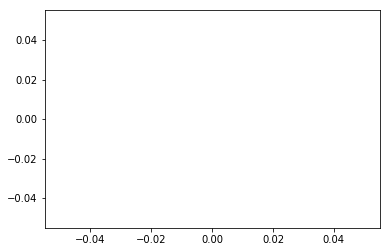

In [18]:
# GA runner code
proj_type = "Mixed"
selection_prob = 0.7
k = 5
initial_population_size = 500
num_parents_mating = 40
swap_prob = 0.5
swap_prob_min = 0.5
decay_coefficient = .95
num_generations = 200
num_runs =1
cost_decay = []

for run in range(num_runs):
  initial_population = generate_population(proj_type,initial_population_size)
  cost_initial_population = []
  cost_decay_generation = []
  for i in range(initial_population_size):
    cost_initial_population.append(sequence_output(proj_type,initial_population[i]))
  new_population = initial_population
  cost_new_population = cost_initial_population
  parents, cost_parents = select_mating_pool(k, selection_prob, new_population, cost_initial_population, num_parents_mating)
  for generation in range(num_generations):
    # parents = select_mating_pool(k, selection_prob, new_population, cost_new_population, num_parents_mating)

    # t0 = time.time()
    offsprings = crossover(parents)
    # t1 = time.time()
    # print("crossover time: ",t1-t0 )
    
    offsprings_mutated = mutation(offsprings,swap_prob + swap_prob_min)
    # t2 = time.time()
    # print("mutation time: ",t2-t1 )

    swap_prob = swap_prob*decay_coefficient
    cost_mutated = []

    for i in range(len(offsprings_mutated)):
      cost_mutated.append(sequence_output(proj_type,offsprings_mutated[i]))
    # print(len(cost_mutated))
    # t3 = time.time()
    # print("cost computation time: ",t3-t2 )


    new_population, cost_new_population = survivor_selection(offsprings_mutated + parents,cost_mutated + cost_parents,num_parents_mating)
    # t4= time.time()
    # print("survivor selection time: ",t4-t3 )
    parents = new_population
    cost_parents =  cost_new_population

    print(cost_new_population[0])
    cost_decay_generation.append(cost_new_population[0])
    plt.plot(cost_decay_generation[5:], color="skyblue")
  cost_decay.append(cost_decay_generation)

In [ ]:
plt.figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
for item in cost_decay:
  plt.plot(item)
plt.xlabel("generations")
plt.ylabel("total reward")
plt.grid(True)  

In [ ]:
# Yearly production
start_date_sequence, total_production_oil, total_production_gas = yearly_production(new_population[0])
years = range(2019,2041)
plt.figure(num=None, figsize=(21, 6), dpi=100, facecolor='w', edgecolor='k')
plt.fill_between(years, [x / 365 for x in total_production_oil]  , color="skyblue", alpha=0.3, label = "oil (m3/day)")
plt.plot(years,  [x / 365 for x in total_production_oil], color="skyblue")
plt.fill_between(years, [x / 365 for x in total_production_gas]  , color="firebrick", alpha=0.3, label = "gas (km3/day)")
plt.plot(years,  [x / 365 for x in total_production_gas], color="firebrick")
# Add titles
# plt.title("Oil production", loc="center")
plt.xlabel("years")
plt.xticks(years)
plt.ylabel("total production")
plt.grid(True)
plt.legend(loc='upper right')

In [ ]:
# solution = [ele for ele in new_population[0] if ele <82]
solution = new_population[0]

In [ ]:
waiting = []

for index in new_population[0]:
  if (index>81):
    waiting.append(180)
  else:
    waiting.append(0)

print(waiting)



In [ ]:
sum(total_production_oil[2:7])

In [ ]:
# Histograms first year production of optimal sequence 
fig, ax = plt.subplots(figsize=(55,10), facecolor='white', dpi= 70)
prod_first_year = []
proj_names = []
# Annotate Text
order = 0
for index in solution:
  proj_names.append(df_all.loc[index].values[0])
  step = df_all.loc[index].values[2]-2019
  prod_first_year.append(df_all.loc[index].values[4+step])
  ax.text(order, df_all.loc[index].values[4+step]+10, df_all.loc[index].values[4+step], horizontalalignment='center')
  ax.text(order, 25, str(start_date_sequence[order+1]) + " days " + "[" + str(df_all.loc[index].values[2]) + "]",va='bottom', rotation=90)
  order = order+1
colors = []

for index in solution:
  if (df_all.loc[index].values[1] == "Oil"):
    colors.append('skyblue')
  else:
    colors.append('firebrick')

ax.vlines(x=proj_names, ymin=0, ymax=prod_first_year, colors=colors, alpha=0.5, linewidth=28)

# ax.set_title('First year production of sequence', fontdict={'size':22})
ax.set(ylabel='Production first year (m3/day)', ylim=(0, 450))
plt.xticks(proj_names, rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

In [ ]:

# Histogram for average production
window_size = 5
fig, ax = plt.subplots(figsize=(60,15), facecolor='white', dpi= 60)
average_prod = []
proj_names = []
# Annotate Text
order = 0
for index in solution:
  proj_names.append(df_all.loc[index].values[0])
  step = df_all.loc[index].values[2]-2019
  mean_prod = mean(df_all.loc[index].values[4+step:4+step+window_size])
  average_prod.append(mean_prod)
  ax.text(order,mean_prod+10, round(mean_prod,1), horizontalalignment='center')
  ax.text(order, 25, str(start_date_sequence[order+1]) + " days " + "[" + str(df_all.loc[index].values[2]) + "]",va='bottom', rotation=90)
  order = order+1

ax.vlines(x=proj_names, ymin=0, ymax=average_prod, colors=colors, alpha=0.5, linewidth=28)

# ax.set_title('First year production of sequence', fontdict={'size':22})
ax.set(ylabel='five year average (m3/day)', ylim=(0, 350))
plt.xticks(proj_names, rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

In [ ]:
(df_oil.loc[25].values[4:8])

In [ ]:
def project_production(index_sequence, project_index):
  global df_oil
  global df_gas
  start_date = 0
  years = 22 # from 2019 to 2040
  total_production = [0]*22
  for index in index_sequence:
    start_date = start_date + df_oil.loc[index].values[3]
    start_year = start_date//365
    days_left = 365 - start_date%365
    if (index ==  project_index):
      total_production[start_year] = days_left*df_oil.loc[project_index].values[3+start_year]
      for year in range(start_year+1,years):
        total_production[year] = 365*df_oil.loc[project_index].values[3+year]
      break    
  return total_production

In [ ]:
x = range(2019,2041)
subplots_adjust(hspace=0.000)
number_of_subplots=10
fig, ax = plt.subplots(number_of_subplots,figsize=(20,30), dpi=100)
# plt.figure(num=None, figsize=(21, 6), dpi=100, facecolor='w', edgecolor='k')
for i,v in enumerate(range(number_of_subplots)):
    v = v+1
    y = project_production(new_population[0], new_population[0][i])
    ax[i] = subplot(number_of_subplots,1,v)
    ax[i].fill_between( x, y, color="skyblue", alpha=0.3)
    ax[i].plot(x, y, color="skyblue")
    ax[i].set_xticks(x)
    ax[i].set_yticks([0,20000,40000,60000,80000,100000,120000,140000,160000])
    ax[i].grid(True)

    # plt.fill_between(x, y,  alpha=0.3)
    # plt.plot(x, y)
    # plt.xticks(x)
    # plt.yticks([0,20000,40000,60000,80000,100000,120000,140000,160000])
 
# Add titles
# plt.title("An area chart", loc="left")
# plt.xlabel("years")
# plt.ylabel("total oil production")
# plt.show()